**Objective**: Test which exploration regime is optimal. 

Compare
- ballistic motion
- Lévy walks
- exponential walks
- Brownian walks

with respect to the parameters
1. Environment Size
2. Number of Food Particles
3. Food Buffer Size

In [1]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params, agent_classes
from simulation import Simulation
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
from pathlib import Path
from config import DATA_PATH

folder = 'none'
params = Params.from_json('parameters.json')
params.save = False

agents = ['ballistic', 'levy', 'exponential', 'brownian']

# 1. Environment Size

In [2]:
plt.clf()
data = {agent: [] for agent in agents}
params.num_food = 50
size_range = np.arange(50, 500, 5)

def run_simulation(args):
    size, agent = args
    params.size = size
    sim = Simulation(params, agent_classes[agent])
    return agent, np.mean(sim.run(folder), axis=(0, 1))

with Pool(10) as pool:
    tasks = [(size, agent) for size in size_range for agent in agents]
    results = list(tqdm(pool.imap_unordered(run_simulation, tasks), total=len(tasks)))

for agent, result in results:
    data[agent].append(result)

100%|██████████| 360/360 [06:39<00:00,  1.11s/it]


<Figure size 640x480 with 0 Axes>

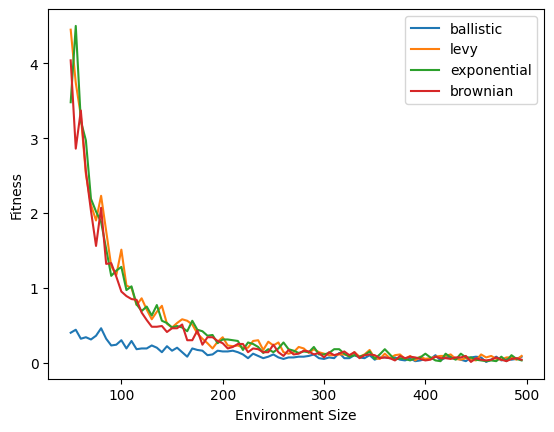

In [3]:
for agent_type, values in data.items():
    plt.plot(size_range, values, label=agent_type)

plt.legend()
plt.xlabel('Environment Size')
plt.ylabel('Fitness')
path = Path(DATA_PATH)
path.mkdir(parents=True, exist_ok=True)
plt.savefig(path / 'environment_sizes.png')

# 2. Number of Food Particles

Note: simulations with higher numbers of food particles take longer to run.

In [4]:
plt.clf()
data = {agent: [] for agent in agents}
params.size = 200
num_food_range = np.arange(10, 200, 5)

def run_simulation(args):
    num_food, agent = args
    params.num_food = num_food
    sim = Simulation(params, agent_classes[agent])
    return agent, np.mean(sim.run(folder), axis=(0, 1))

with Pool(10) as pool:
    tasks = [(num_food, agent) for num_food in num_food_range for agent in agents]
    results = list(tqdm(pool.imap_unordered(run_simulation, tasks), total=len(tasks)))

for agent, result in results:
    data[agent].append(result)

100%|██████████| 152/152 [04:59<00:00,  1.97s/it]


<Figure size 640x480 with 0 Axes>

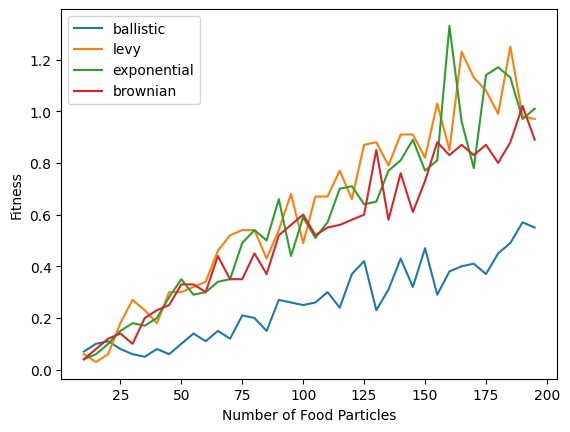

In [5]:
for agent_type, values in data.items():
    plt.plot(num_food_range, values, label=agent_type)

plt.legend()
plt.xlabel('Number of Food Particles')
plt.ylabel('Fitness')
path = Path(DATA_PATH)
path.mkdir(parents=True, exist_ok=True)
plt.savefig(path / 'number_of_food_particles.png')

# 3. Food Buffer Size

In [6]:
plt.clf()
data = {agent: [] for agent in agents}
params.size = 200
params.num_food = 50

food_buffer_range = np.arange(1, 20, 1)

def run_simulation(args):
    food_buffer, agent = args
    params.food_buffer = food_buffer
    sim = Simulation(params, agent_classes[agent])
    return agent, np.mean(sim.run(folder), axis=(0, 1))

with Pool(10) as pool:
    tasks = [(food_buffer, agent) for food_buffer in food_buffer_range for agent in agents]
    results = list(tqdm(pool.imap_unordered(run_simulation, tasks), total=len(tasks)))

for agent, result in results:
    data[agent].append(result)

100%|██████████| 76/76 [01:23<00:00,  1.09s/it]


<Figure size 640x480 with 0 Axes>

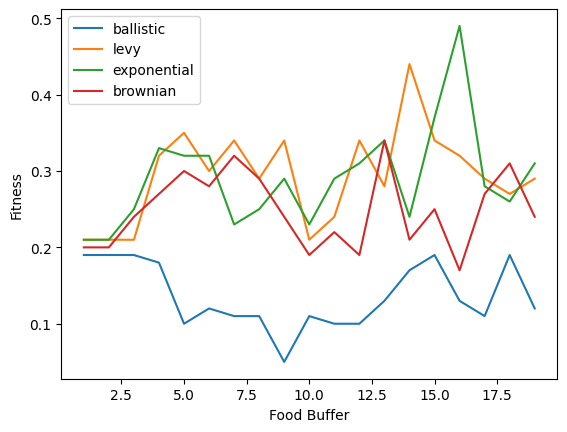

In [7]:
for agent_type, values in data.items():
    plt.plot(food_buffer_range, values, label=agent_type)

plt.legend()
plt.xlabel('Food Buffer')
plt.ylabel('Fitness')
path = Path(DATA_PATH)
path.mkdir(parents=True, exist_ok=True)
plt.savefig(path / 'food_buffer.png')